In [2]:
%load_ext sql
%matplotlib inline
%sql postgresql://appdev@data:5432/appdev

'Connected: appdev@appdev'

In [3]:
import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('postgresql://appdev@data/appdev', echo=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # Q.1.a
 Find the tuple with the largest population

In [4]:
%%sql SELECT * FROM geonames
order by population desc
LIMIT 1;

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


 # Q.1.b
 Now calculate the distance from all locations to the tuple above using the <-> function

In [5]:
%%sql SELECT Point(36.0,34.0) <-> Point(longitude,latitude) as "distance",geonameid,name FROM geonames
order by distance asc
LIMIT 10;

10 rows affected.


distance,geonameid,name
0.0,305104,Levant
0.0129523588585232,6271836,Ard Taraya
0.0399076559071088,273689,Njâsset el Aaoujâ
0.0565699284072415,6271845,El Mâred
0.0797932553540693,6276938,Machraa Tem el Qboûr
0.0902906999640604,433496,Sahlêt el Bayâder
0.0917604370085532,266378,Dahr Ouâdi ed Dabboûr
0.108690022541169,6271821,Ed Darjé
0.111114000018,269644,Dahr el Qadîb
0.117548193520785,272981,Jouar es Souâaîr


# Q.1.C
Now calculate the distance from all locations to the tuple above using the haversine distance

In [6]:
%%sql select asin(
sqrt(
sin(radians(34-latitude)/2)^2 +
    sin(radians(36-longitude)/2)^2 *
    cos(radians(latitude)) *
    cos(radians(34))

)) * 12756.2 as "distance in km",geonameid,name FROM geonames
order by "distance in km" asc
LIMIT 10;

10 rows affected.


distance in km,geonameid,name
0.0,305104,Levant
1.3641860630566,6271836,Ard Taraya
3.74756593908423,273689,Njâsset el Aaoujâ
5.77715248210322,6271845,El Mâred
7.37838323237415,6276938,Machraa Tem el Qboûr
9.69401448457124,266378,Dahr Ouâdi ed Dabboûr
10.0343344184573,6271821,Ed Darjé
10.05068486529,433496,Sahlêt el Bayâder
11.653766322323,269644,Dahr el Qadîb
12.5233737182432,269691,Qabr ed Derzi


# Q.1.D
Plot the latitude and longitude of the largest 1000 populations on a 2-D scatter plot

In [7]:
result = %sql select latitude, longitude, population FROM geonames order by population desc LIMIT 1000;

1000 rows affected.


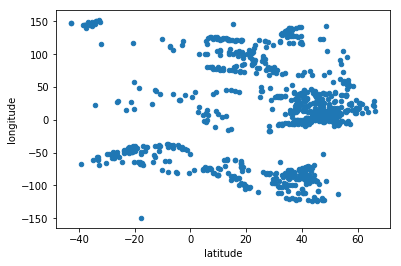

In [8]:
df = pd.DataFrame(result, columns=['latitude', 'longitude','pop'])
df.plot.scatter(x='latitude', y='longitude')

# Q.2.a
Find all the cards that is made by Rob Alexander

401 cards found

In [10]:
%sql SELECT count(*) FROM cards WHERE data @> '{"artist":"Rob Alexander"}';

1 rows affected.


count
401


In [12]:
%sql SELECT data FROM cards WHERE data @> '{"artist":"Rob Alexander"}' limit 5;

5 rows affected.


data
"{'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': ""Double target player's life total. Shuffle Beacon of Immortality into its owner's library."", 'type': 'Instant', 'types': ['Instant'], 'artist': 'Rob Alexander', 'colors': ['White'], 'flavor': 'The cave floods with light. A thousand rays shine forth and meld into one.', 'layout': 'normal', 'number': '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']}"
"{'id': '9cea331c080c3bbc7987c6560f65e39e9d1ed34f', 'cmc': 5, 'name': 'Kavu Climber', 'text': 'When Kavu Climber enters the battlefield, draw a card.', 'type': 'Creature — Kavu', 'power': '3', 'types': ['Creature'], 'artist': 'Rob Alexander', 'colors': ['Green'], 'flavor': '""There was a crack of branches, a rustle of leaves, then a tremendous roar. Our party had no chance as death descended from above.""\n—Taseen, elvish bard', 'layout': 'normal', 'number': '273', 'rarity': 'Common', 'manaCost': '{3}{G}{G}', 'subtypes': ['Kavu'], 'imageName': 'kavu climber', 'mciNumber': '273', 'toughness': '3', 'multiverseid': 129511, 'colorIdentity': ['G']}"
"{'id': '28cc7c79cca8939fd9661f7abfc6ca453715b75e', 'cmc': 0, 'name': 'Llanowar Wastes', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {G} to your mana pool. Llanowar Wastes deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '355', 'rarity': 'Rare', 'imageName': 'llanowar wastes', 'mciNumber': '355', 'multiverseid': 129627, 'colorIdentity': ['B', 'G']}"
"{'id': '7a90b7ba6197f8774ed99ecf75ac9abb3e0c0f20', 'cmc': 0, 'name': 'Shivan Reef', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {U} or {R} to your mana pool. Shivan Reef deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '357', 'rarity': 'Rare', 'imageName': 'shivan reef', 'mciNumber': '357', 'multiverseid': 129731, 'colorIdentity': ['U', 'R']}"
"{'id': '8d1035f151615c949d0645b70fe01d8ab4a3f796', 'cmc': 0, 'name': 'Sulfurous Springs', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {R} to your mana pool. Sulfurous Springs deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '359', 'rarity': 'Rare', 'imageName': 'sulfurous springs', 'mciNumber': '359', 'multiverseid': 129751, 'colorIdentity': ['B', 'R']}"


# Q.2.b
Find all the cards that have the subtype "Human"

3192 human cards found

In [13]:
%%sql SELECT count(*) FROM cards 
WHERE data @> '{"subtypes":["Human"]}'

1 rows affected.


count
3192


In [15]:
%%sql SELECT data FROM cards 
WHERE data @> '{"subtypes":["Human"]}'
limit 5;

5 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
"{'id': 'd3488c0a916bd922856473155a8b49ec23fc2217', 'cmc': 4, 'name': 'Ballista Squad', 'text': '{X}{W}, {T}: Ballista Squad deals X damage to target attacking or blocking creature.', 'type': 'Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Matthew D. Wilson', 'colors': ['White'], 'flavor': 'The perfect antidote for a tightly packed formation.', 'layout': 'normal', 'number': '8', 'rarity': 'Uncommon', 'manaCost': '{3}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'ballista squad', 'mciNumber': '8', 'toughness': '2', 'multiverseid': 129477, 'colorIdentity': ['W']}"
"{'id': '29c46fca29e5de01dba3bbf05393325bc9132735', 'cmc': 3, 'name': 'Benalish Knight', 'text': 'Flash (You may cast this spell any time you could cast an instant.)\nFirst strike (This creature deals combat damage before creatures without first strike.)', 'type': 'Creature — Human Knight', 'power': '2', 'types': ['Creature'], 'artist': 'Zoltan Boros & Gabor Szikszai', 'colors': ['White'], 'flavor': '""We called them \'armored lightning.\'""\n—Gerrard of the Weatherlight', 'layout': 'normal', 'number': '11', 'rarity': 'Common', 'manaCost': '{2}{W}', 'subtypes': ['Human', 'Knight'], 'imageName': 'benalish knight', 'mciNumber': '11', 'toughness': '2', 'multiverseid': 136279, 'colorIdentity': ['W']}"
"{'id': 'e8b8dea65daf4e9070cce5de62bdbea0bf36d47c', 'cmc': 4, 'name': 'Cho-Manno, Revolutionary', 'text': 'Prevent all damage that would be dealt to Cho-Manno, Revolutionary.', 'type': 'Legendary Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Steven Belledin', 'colors': ['White'], 'flavor': '""Mercadia\'s masks can no longer hide the truth. Our day has come at last.""', 'layout': 'normal', 'number': '12', 'rarity': 'Rare', 'manaCost': '{2}{W}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'cho-manno, revolutionary', 'mciNumber': '12', 'toughness': '2', 'supertypes': ['Legendary'], 'multiverseid': 130554, 'colorIdentity': ['W']}"
"{'id': '80a6b907fc380ed97615e8abc0fe6071c4ceef67', 'cmc': 3, 'name': 'Field Marshal', 'text': 'Other Soldier creatures get +1/+1 and have first strike. (They deal combat damage before creatures without first strike.)', 'type': 'Creature — Human Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Stephen Tappin', 'colors': ['White'], 'flavor': 'He is the only one who sees the patterns in the overlapping maps and conflicting reports.', 'layout': 'normal', 'number': '15', 'rarity': 'Rare', 'manaCost': '{1}{W}{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'field marshal', 'mciNumber': '15', 'toughness': '2', 'multiverseid': 135258, 'colorIdentity': ['W']}"


# Q.2.c
Group all the cards based on the colour. Aggregate them by counting the number of cards per colour.

would liked to have seperated all the combination cards. Such as ["White", "Green"] into 1 count of white and 1 count of green instead a single count for the combination, just couldn't get it to work properly

In [87]:
result_2 = %sql SELECT count(*),data -> 'colors'FROM cards group by data -> 'colors' order by count desc
result_2

32 rows affected.


count,?column?
7391,None
4977,['Green']
4877,['Black']
4858,['Red']
4755,['White']
4680,['Blue']
276,"['White', 'Green']"
273,"['Red', 'Green']"
260,"['Blue', 'Black']"
258,"['Black', 'Red']"


<Container object of 32 artists>

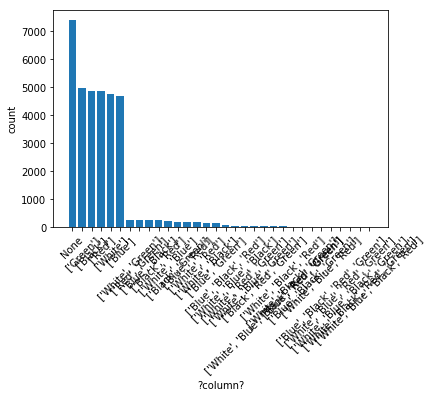

In [92]:
result_2.bar()